<a href="https://colab.research.google.com/github/MagfirohIndahKarisma/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 3
### Operasi Citra Sederhana – Linier Brightness, Contrast, Inverse, Logarithmic Brightness, dan Grayscale Image
## PRAKTIKUM

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### Transformasi Linier Brightness

Formula: g(x,y)=f(x,y)+b

- g(x,y) adalah nilai pixel setelah transformasi
- f(x,y) adalah nilai pixel asli
- b adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 70


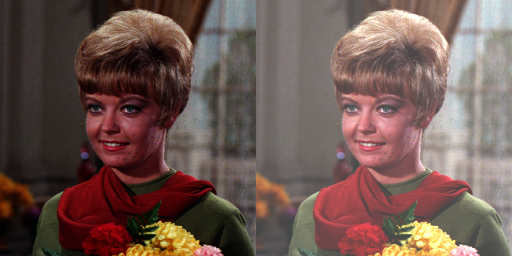

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Study/PCVK/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

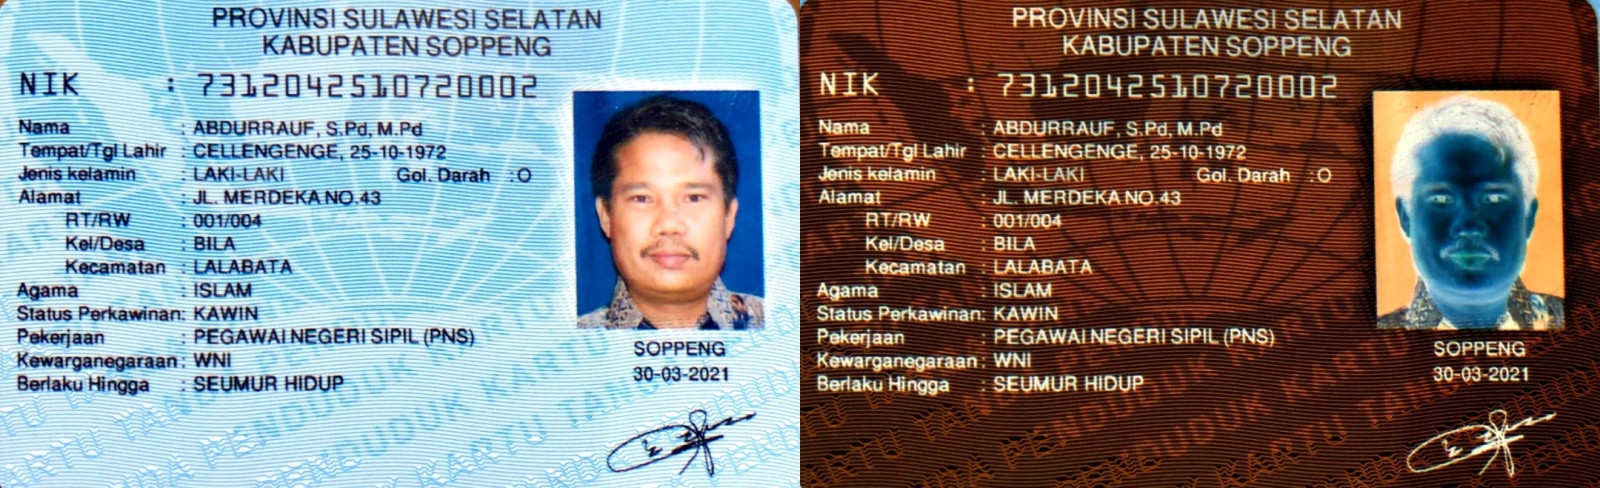

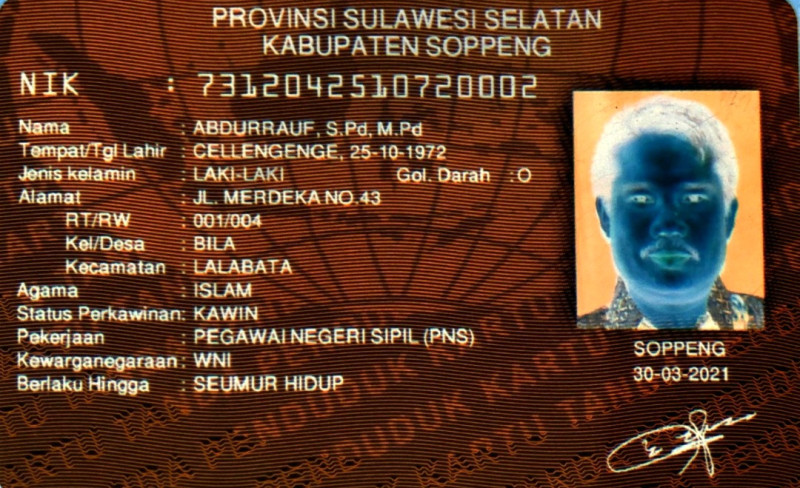

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/KTP.jpeg'
image=cv.imread(path)
inverted_image = cv.bitwise_not(image)

invertedFrame=cv.hconcat((image,inverted_image))
cv2_imshow(invertedFrame)

path='/content/drive/MyDrive/Colab Notebooks/KTP.jpeg'
image = cv.imread(path)
invert = np.zeros(image.shape,image.dtype)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            invert[y,x,c]=np.clip(255 - image[y,x,c] ,0,255)

cv2_imshow(invert)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:60
Masukkan kontras [1.0 - 3.0]:2


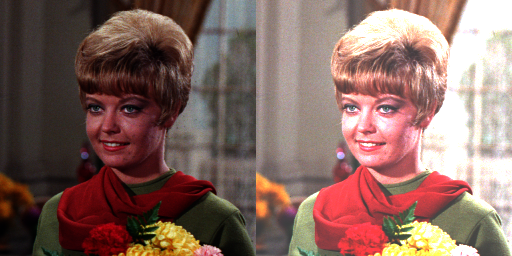

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Study/PCVK/images/female.tiff')
contrast_image = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


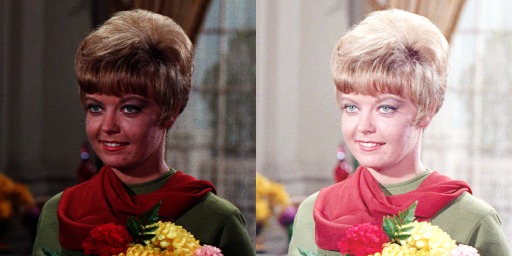

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Study/PCVK/images/female.tiff')
brightness_image = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Text(0.5, 1.0, 'Hasil averaging')

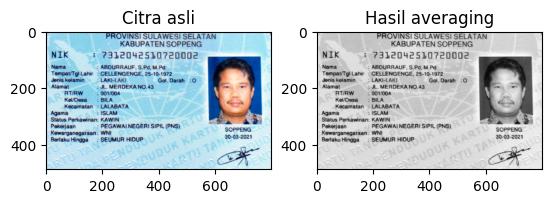

In [ ]:
# a. Averaging

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_avg = cv.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')
img_avg[:] = img_avg.mean(axis=2, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[0].set_title('Citra asli')
ax[1].imshow(img_avg)
ax[1].set_title('Hasil averaging')

<ipython-input-25-b45b55c9eba7>:14: RuntimeWarning: overflow encountered in ubyte_scalars
  lightness = (max(red, green, blue) + min(red, green, blue)) // 2


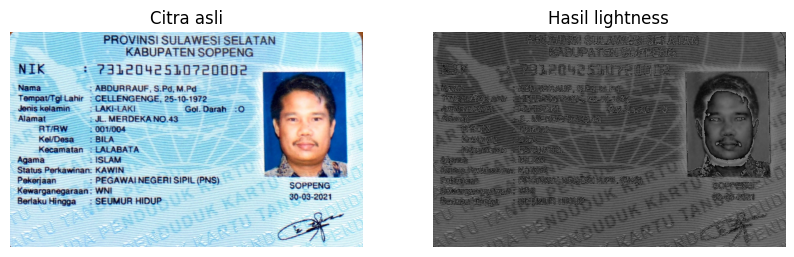

In [25]:
# b. Lightness

def grayscaleLightness(image):

    grayscale_image = image.copy()

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):

            red = image[y, x, 2]
            green = image[y, x, 1]
            blue = image[y, x, 0]

            lightness = (max(red, green, blue) + min(red, green, blue)) // 2

            grayscale_image[y, x, 0] = lightness
            grayscale_image[y, x, 1] = lightness
            grayscale_image[y, x, 2] = lightness

    return grayscale_image

path ='/content/drive/MyDrive/Colab Notebooks/KTP.jpeg'
image = cv.imread(path)

grayscale_lightness_image = grayscaleLightness(image)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Citra asli')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(grayscale_lightness_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Hasil lightness')
ax[1].axis('off')
plt.show()

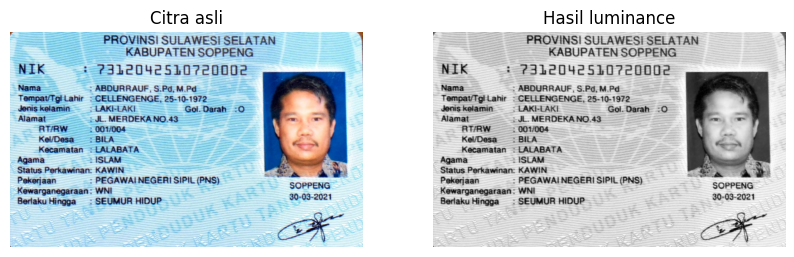

In [26]:
# c. Luminance

def grayscaleLuminance(image):

    grayscale_image = image.copy()

    luminance = 0.21 * image[:, :, 2] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 0]
    grayscale_image[:, :, 0] = luminance
    grayscale_image[:, :, 1] = luminance
    grayscale_image[:, :, 2] = luminance
    return grayscale_image

path = '/content/drive/MyDrive/Colab Notebooks/KTP.jpeg'
image = cv.imread(path)

grayscale_luminance_image = grayscaleLuminance(image)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Citra asli')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(grayscale_luminance_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Hasil luminance')
ax[1].axis('off')
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

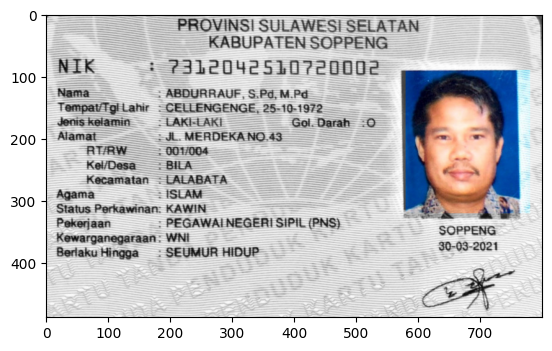

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/KTP.jpeg'
image = cv.imread(path)

x1, y1 = 580, 90
x2, y2 = 780, 320

result_image = image.copy()

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        if x1 <= x <= x2 and y1 <= y <= y2:
            result_image[y, x] = image[y, x]
        else:
            gray_value = np.mean(image[y, x])
            result_image[y, x] = [gray_value, gray_value, gray_value]

plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.show()

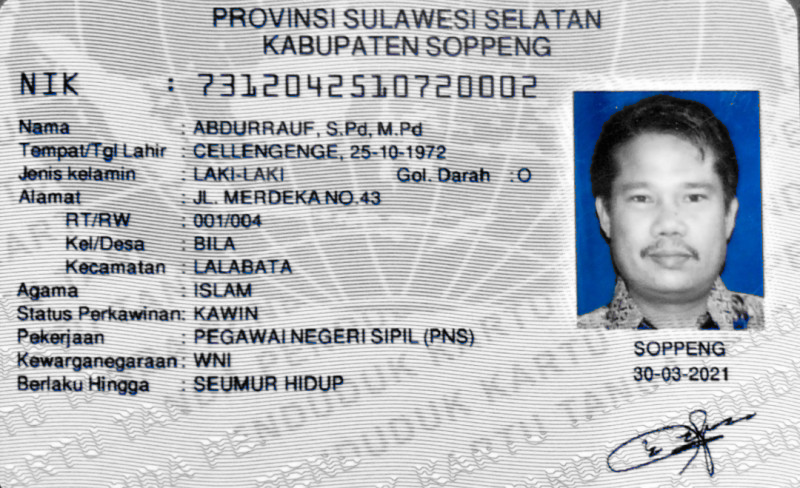

In [ ]:
#hanya menampilkan warna biru tua

image = cv.imread('/content/drive/MyDrive/Colab Notebooks/KTP.jpeg')

lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])
height, width, channels = image.shape

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
final_result = np.zeros_like(image)

for y in range(height):
    for x in range(width):
        pixel = image[y, x]
        if (pixel >= lower_blue).all() and (pixel <= upper_blue).all():
            final_result[y, x] = image[y, x]
        else:
            final_result[y, x] = [gray[y, x], gray[y, x], gray[y, x]]

cv2_imshow(final_result)
cv.waitKey(0)
cv.destroyAllWindows()